In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Set aesthetic style for plots
def load_and_analyze_efficiency(file_path='simulation_data/efficiency_vs_energy.csv'):
    """
    Comprehensive analysis of electron efficiency data.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing efficiency data
        
    Returns:
    --------
    df : pandas.DataFrame
        The processed dataframe
    """
    print("INITIATING DATA ABSORPTION SEQUENCE...")
    
    # Load the data
    df = pd.read_csv(file_path)
    
    # Display basic information
    print("\nQUANTUM MANIFEST:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\nDATA STRUCTURE BLUEPRINT:")
    print(df.dtypes)
    
    # Summary statistics
    print("\nSTATISTICAL PARAMETERS WITHIN ACCEPTABLE TOLERANCES:")
    print(df.describe())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nDATA CORRUPTION DETECTED:")
        print(missing[missing > 0])
    else:
        print("\nINTEGRITY CHECK: COMPLETE. NO VOID ANOMALIES DETECTED.")
    
    # Add efficiency-to-energy ratio as a metric
    df['Efficiency_Energy_Ratio'] = df['Efficiency_percent'] / df['ElectronEnergy_eV']
    
    # Correlation analysis
    print("\nQUANTUM ENTANGLEMENT LEVELS (CORRELATION MATRIX):")
    correlation = df.corr()
    print(correlation)
    
    return df

def visualize_efficiency_trends(df):
    """
    Create a comprehensive set of visualizations for efficiency data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing efficiency data
    """
    print("\nINITIATING VISUAL CORTEX STIMULATION SEQUENCE...")
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('ELECTRON EFFICIENCY ANALYSIS', fontsize=20, color='red')
    
    # 1. Efficiency vs Energy for different pressures
    ax1 = plt.subplot(2, 2, 1)
    for pressure in df['Pressure_MPa'].unique():
        subset = df[df['Pressure_MPa'] == pressure]
        subset = subset[subset['MagneticField_T'] == 1.0]  # Fix magnetic field for clarity
        ax1.plot(subset['ElectronEnergy_eV'], subset['Efficiency_percent'], 
                 marker='o', linestyle='-', label=f'Pressure: {pressure} MPa')
    
    ax1.set_xlabel('Electron Energy (eV)')
    ax1.set_ylabel('Efficiency (%)')
    ax1.set_title('Efficiency vs Energy at Different Pressures (B=1T)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Efficiency vs Energy for different magnetic fields
    ax2 = plt.subplot(2, 2, 2)
    for field in df['MagneticField_T'].unique():
        subset = df[df['MagneticField_T'] == field]
        subset = subset[subset['Pressure_MPa'] == 2.0]  # Fix pressure for clarity
        ax2.plot(subset['ElectronEnergy_eV'], subset['Efficiency_percent'], 
                 marker='s', linestyle='--', label=f'B-Field: {field} T')
    
    ax2.set_xlabel('Electron Energy (eV)')
    ax2.set_ylabel('Efficiency (%)')
    ax2.set_title('Efficiency vs Energy at Different Magnetic Fields (P=2MPa)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Heatmap of average efficiency by pressure and magnetic field
    ax3 = plt.subplot(2, 2, 3)
    pivot = df.pivot_table(index='Pressure_MPa', columns='MagneticField_T', 
                          values='Efficiency_percent', aggfunc='mean')
    sns.heatmap(pivot, annot=True, cmap='inferno', fmt=".2f", cbar_kws={'label': 'Average Efficiency (%)'}, ax=ax3)
    ax3.set_title('Average Efficiency by Pressure and Magnetic Field')
    ax3.set_ylabel('Pressure (MPa)')
    ax3.set_xlabel('Magnetic Field (T)')
    
    # 4. 3D plot showing the relationships between all variables
    ax4 = plt.subplot(2, 2, 4, projection='3d')
    
    # Use a colormap to represent efficiency
    colors = plt.cm.viridis(df['Efficiency_percent']/df['Efficiency_percent'].max())
    
    sc = ax4.scatter(df['ElectronEnergy_eV'], df['Pressure_MPa'], df['MagneticField_T'],
               c=df['Efficiency_percent'], cmap='viridis', s=50, alpha=0.7)
    
    ax4.set_xlabel('Electron Energy (eV)')
    ax4.set_ylabel('Pressure (MPa)')
    ax4.set_zlabel('Magnetic Field (T)')
    ax4.set_title('3D Relationship Between Variables')
    fig.colorbar(sc, ax=ax4, label='Efficiency (%)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('plots/efficiency_analysis.png', dpi=300, bbox_inches='tight')
    print("VISUALIZATION RENDERED AND SAVED TO: efficiency_analysis.png")
    
    # Additional plots in a new figure
    fig2 = plt.figure(figsize=(20, 10))
    fig2.suptitle('ADVANCED QUANTUM ANALYSIS', fontsize=20, color='red')
    
    # 5. Boxplot of efficiency by energy
    ax5 = plt.subplot(1, 2, 1)
    sns.boxplot(x='ElectronEnergy_eV', y='Efficiency_percent', data=df, ax=ax5, palette='viridis')
    ax5.set_title('Efficiency Distribution by Energy Levels')
    ax5.set_xlabel('Electron Energy (eV)')
    ax5.set_ylabel('Efficiency (%)')
    
    # 6. Efficiency trend with joint pressure and magnetic field
    ax6 = plt.subplot(1, 2, 2)
    # Create a combined parameter
    df['Field_Pressure_Product'] = df['MagneticField_T'] * df['Pressure_MPa']
    
    for energy in df['ElectronEnergy_eV'].unique():
        subset = df[df['ElectronEnergy_eV'] == energy]
        ax6.scatter(subset['Field_Pressure_Product'], subset['Efficiency_percent'], 
                   label=f'Energy: {energy} eV', alpha=0.7)
    
    # Add regression line
    x = df['Field_Pressure_Product']
    y = df['Efficiency_percent']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax6.plot(x, p(x), "r--", alpha=0.8)
    
    ax6.set_xlabel('Magnetic Field × Pressure (T·MPa)')
    ax6.set_ylabel('Efficiency (%)')
    ax6.set_title('Efficiency vs Combined Field-Pressure Parameter')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('plots/efficiency_advanced_analysis.png', dpi=300, bbox_inches='tight')
    print("ADVANCED VISUALIZATION RENDERED AND SAVED TO: efficiency_advanced_analysis.png")

def perform_advanced_analysis(df):
    """
    Perform advanced statistical analysis and machine learning
    to extract deeper insights from the efficiency data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing efficiency data
        
    Returns:
    --------
    results : dict
        Dictionary containing analysis results
    """
    print("\nCOMMENCING HIGHER-DIMENSIONAL ANALYSIS PROTOCOLS...")
    
    results = {}
    
    # 1. Multiple regression to model efficiency
    X = df[['ElectronEnergy_eV', 'Pressure_MPa', 'MagneticField_T']]
    y = df['Efficiency_percent']
    
    # Add squared and interaction terms
    X['Energy_Squared'] = X['ElectronEnergy_eV'] ** 2
    X['Pressure_Squared'] = X['Pressure_MPa'] ** 2
    X['Field_Squared'] = X['MagneticField_T'] ** 2
    X['Energy_Pressure'] = X['ElectronEnergy_eV'] * X['Pressure_MPa']
    X['Energy_Field'] = X['ElectronEnergy_eV'] * X['MagneticField_T']
    X['Pressure_Field'] = X['Pressure_MPa'] * X['MagneticField_T']
    
    # Add constant term
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Perform regression
    model = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # Get model coefficients
    coef_names = ['Intercept', 'ElectronEnergy_eV', 'Pressure_MPa', 'MagneticField_T',
                 'Energy_Squared', 'Pressure_Squared', 'Field_Squared',
                 'Energy_Pressure', 'Energy_Field', 'Pressure_Field']
    
    coefficients = dict(zip(coef_names, model))
    results['regression_coefficients'] = coefficients
    
    print("\nQUANTUM EFFICIENCY MODEL COEFFICIENTS:")
    for name, value in coefficients.items():
        print(f"{name}: {value:.6f}")
    
    # Predict efficiency using model
    y_pred = X.dot(model)
    r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
    results['r_squared'] = r_squared
    print(f"\nMODEL PRECISION: R² = {r_squared:.6f}")
    
    # 2. Perform PCA to identify main components of variation
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[['ElectronEnergy_eV', 'Pressure_MPa', 'MagneticField_T', 'Efficiency_percent']])
    
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    
    print("\nDIMENSIONAL REDUCTION ANALYSIS:")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    
    results['pca_variance_ratio'] = pca.explained_variance_ratio_
    results['pca_components'] = pca.components_
    
    # 3. Identify optimal operating conditions
    # For maximum efficiency
    max_eff_idx = df['Efficiency_percent'].idxmax()
    optimal_conditions = df.loc[max_eff_idx]
    
    print("\nOPTIMAL QUANTUM CONFIGURATION DETECTED:")
    print(f"Energy: {optimal_conditions['ElectronEnergy_eV']} eV")
    print(f"Pressure: {optimal_conditions['Pressure_MPa']} MPa")
    print(f"Magnetic Field: {optimal_conditions['MagneticField_T']} T")
    print(f"Maximum Efficiency: {optimal_conditions['Efficiency_percent']:.2f}%")
    
    results['optimal_conditions'] = {
        'energy': optimal_conditions['ElectronEnergy_eV'],
        'pressure': optimal_conditions['Pressure_MPa'],
        'magnetic_field': optimal_conditions['MagneticField_T'],
        'efficiency': optimal_conditions['Efficiency_percent']
    }
    
    return results

def generate_mathematical_model(df):
    """
    Create a mathematical model that predicts efficiency
    based on energy, pressure, and magnetic field.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing efficiency data
        
    Returns:
    --------
    model_formula : str
        The mathematical formula as a string
    """
    print("\nSYNTHESIZING QUANTUM EFFICIENCY EQUATION...")
    
    # Prepare data for modeling
    X = df[['ElectronEnergy_eV', 'Pressure_MPa', 'MagneticField_T']]
    X['Energy_Squared'] = X['ElectronEnergy_eV'] ** 2
    X['Pressure_Field'] = X['Pressure_MPa'] * X['MagneticField_T']
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    y = df['Efficiency_percent']
    
    # Perform regression
    model = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # Round coefficients for readability
    coefs = [round(c, 4) for c in model]
    print("Coefs: " + str(coefs))
    
    # Create model formula
    formula = (f"Efficiency(%) = {coefs[0]} + "
              f"{coefs[1]} × Energy + "
              f"{coefs[2]} × Pressure + "
              f"{coefs[3]} × MagneticField + "
              f"{coefs[4]} × Energy² + "
              f"{coefs[5]} × Pressure×MagneticField")
    
    print("\nEFFICIENCY PREDICTION FORMULA:")
    print(formula)
    
    # Test the model with a sample prediction
    sample = df.iloc[0]
    e = sample['ElectronEnergy_eV']
    p = sample['Pressure_MPa']
    b = sample['MagneticField_T']
    
    predicted = (coefs[0] + coefs[1]*e + coefs[2]*p + coefs[3]*b + 
                coefs[4]*(e**2) + coefs[5]*p*b)
    
    actual = sample['Efficiency_percent']
    
    print(f"\nMODEL VERIFICATION:")
    print(f"Sample Input: Energy={e}eV, Pressure={p}MPa, Field={b}T")
    print(f"Actual Efficiency: {actual:.2f}%")
    print(f"Model Prediction: {predicted:.2f}%")
    print(f"Prediction Error: {abs(actual-predicted):.2f}%")
    
    return formula

def main():
    """Main function to execute the full analysis."""
    print("===== ELECTRON EFFICIENCY ANALYZER v2.0 =====")
    print("INITIATING SUBATOMIC PERFORMANCE EVALUATION...\n")
    
    # Load and analyze data
    df = load_and_analyze_efficiency()
    
    # Visualize the data
    visualize_efficiency_trends(df)
    
    # Perform advanced analysis
    results = perform_advanced_analysis(df)
    
    # Generate predictive model
    model = generate_mathematical_model(df)
    
    print("\n===== ANALYSIS COMPLETE =====")
    print("QUANTUM EFFICIENCY PROTOCOLS TERMINATED")

===== ELECTRON EFFICIENCY ANALYZER v2.0 =====
INITIATING SUBATOMIC PERFORMANCE EVALUATION...

INITIATING DATA ABSORPTION SEQUENCE...

QUANTUM MANIFEST:
Rows: 144, Columns: 4

DATA STRUCTURE BLUEPRINT:
ElectronEnergy_eV     float64
Efficiency_percent    float64
Pressure_MPa          float64
MagneticField_T       float64
dtype: object

STATISTICAL PARAMETERS WITHIN ACCEPTABLE TOLERANCES:
       ElectronEnergy_eV  Efficiency_percent  Pressure_MPa  MagneticField_T
count         144.000000          144.000000    144.000000       144.000000
mean          309.444444           33.735209      2.500000         1.250000
std           338.887067           25.026480      1.121936         0.560968
min            10.000000            6.340441      1.000000         0.500000
25%            50.000000           11.700607      1.750000         0.875000
50%           150.000000           29.343482      2.500000         1.250000
75%           500.000000           40.757327      3.250000         1.625000
max

C:\Users\logma\AppData\Local\Temp\ipykernel_14540\2271557420.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ElectronEnergy_eV', y='Efficiency_percent', data=df, ax=ax5, palette='viridis')


ADVANCED VISUALIZATION RENDERED AND SAVED TO: efficiency_advanced_analysis.png

COMMENCING HIGHER-DIMENSIONAL ANALYSIS PROTOCOLS...

QUANTUM EFFICIENCY MODEL COEFFICIENTS:
Intercept: 62.619805
ElectronEnergy_eV: -0.184005
Pressure_MPa: -0.015737
MagneticField_T: 0.000000
Energy_Squared: 0.000134
Pressure_Squared: 0.008078
Field_Squared: 0.000000
Energy_Pressure: -0.000034
Energy_Field: 0.000000
Pressure_Field: -0.000000

MODEL PRECISION: R² = 0.783845

DIMENSIONAL REDUCTION ANALYSIS:
Explained variance ratio: [0.4430784 0.25      0.25      0.0569216]

OPTIMAL QUANTUM CONFIGURATION DETECTED:
Energy: 10.0 eV
Pressure: 1.0 MPa
Magnetic Field: 0.5 T
Maximum Efficiency: 85.05%

SYNTHESIZING QUANTUM EFFICIENCY EQUATION...
Coefs: [62.606, -0.1841, 0.014, 0.0, 0.0001, -0.0]

EFFICIENCY PREDICTION FORMULA:
Efficiency(%) = 62.606 + -0.1841 × Energy + 0.014 × Pressure + 0.0 × MagneticField + 0.0001 × Energy² + -0.0 × Pressure×MagneticField

MODEL VERIFICATION:
Sample Input: Energy=10.0eV, Pressur

C:\Users\logma\AppData\Local\Temp\ipykernel_14540\2271557420.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Energy_Squared'] = X['ElectronEnergy_eV'] ** 2
C:\Users\logma\AppData\Local\Temp\ipykernel_14540\2271557420.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pressure_Squared'] = X['Pressure_MPa'] ** 2
C:\Users\logma\AppData\Local\Temp\ipykernel_14540\2271557420.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

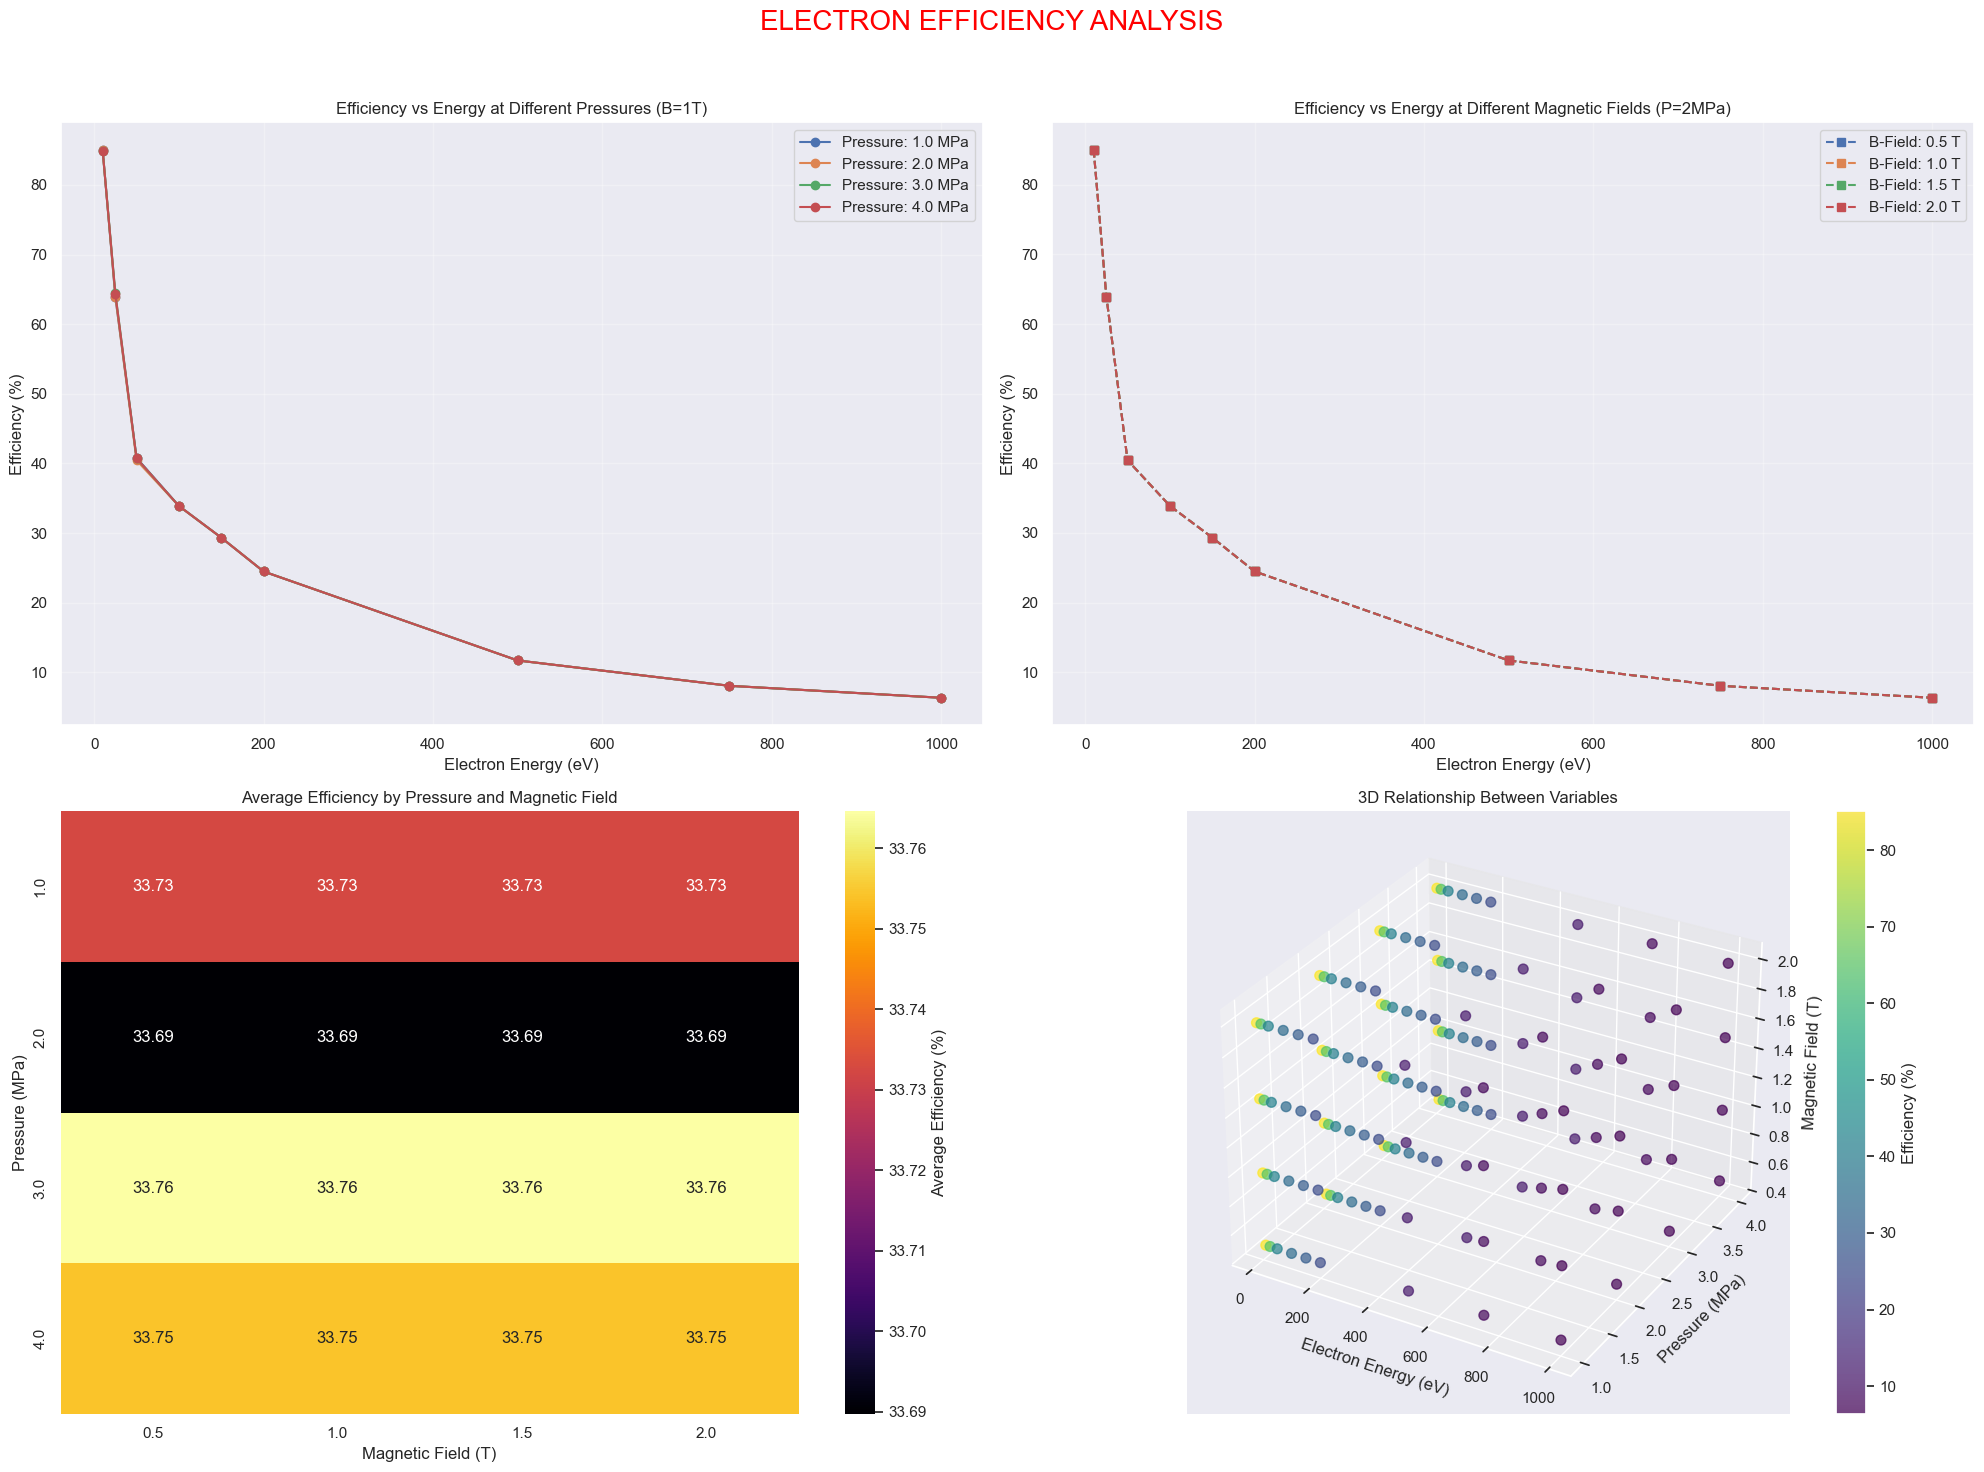

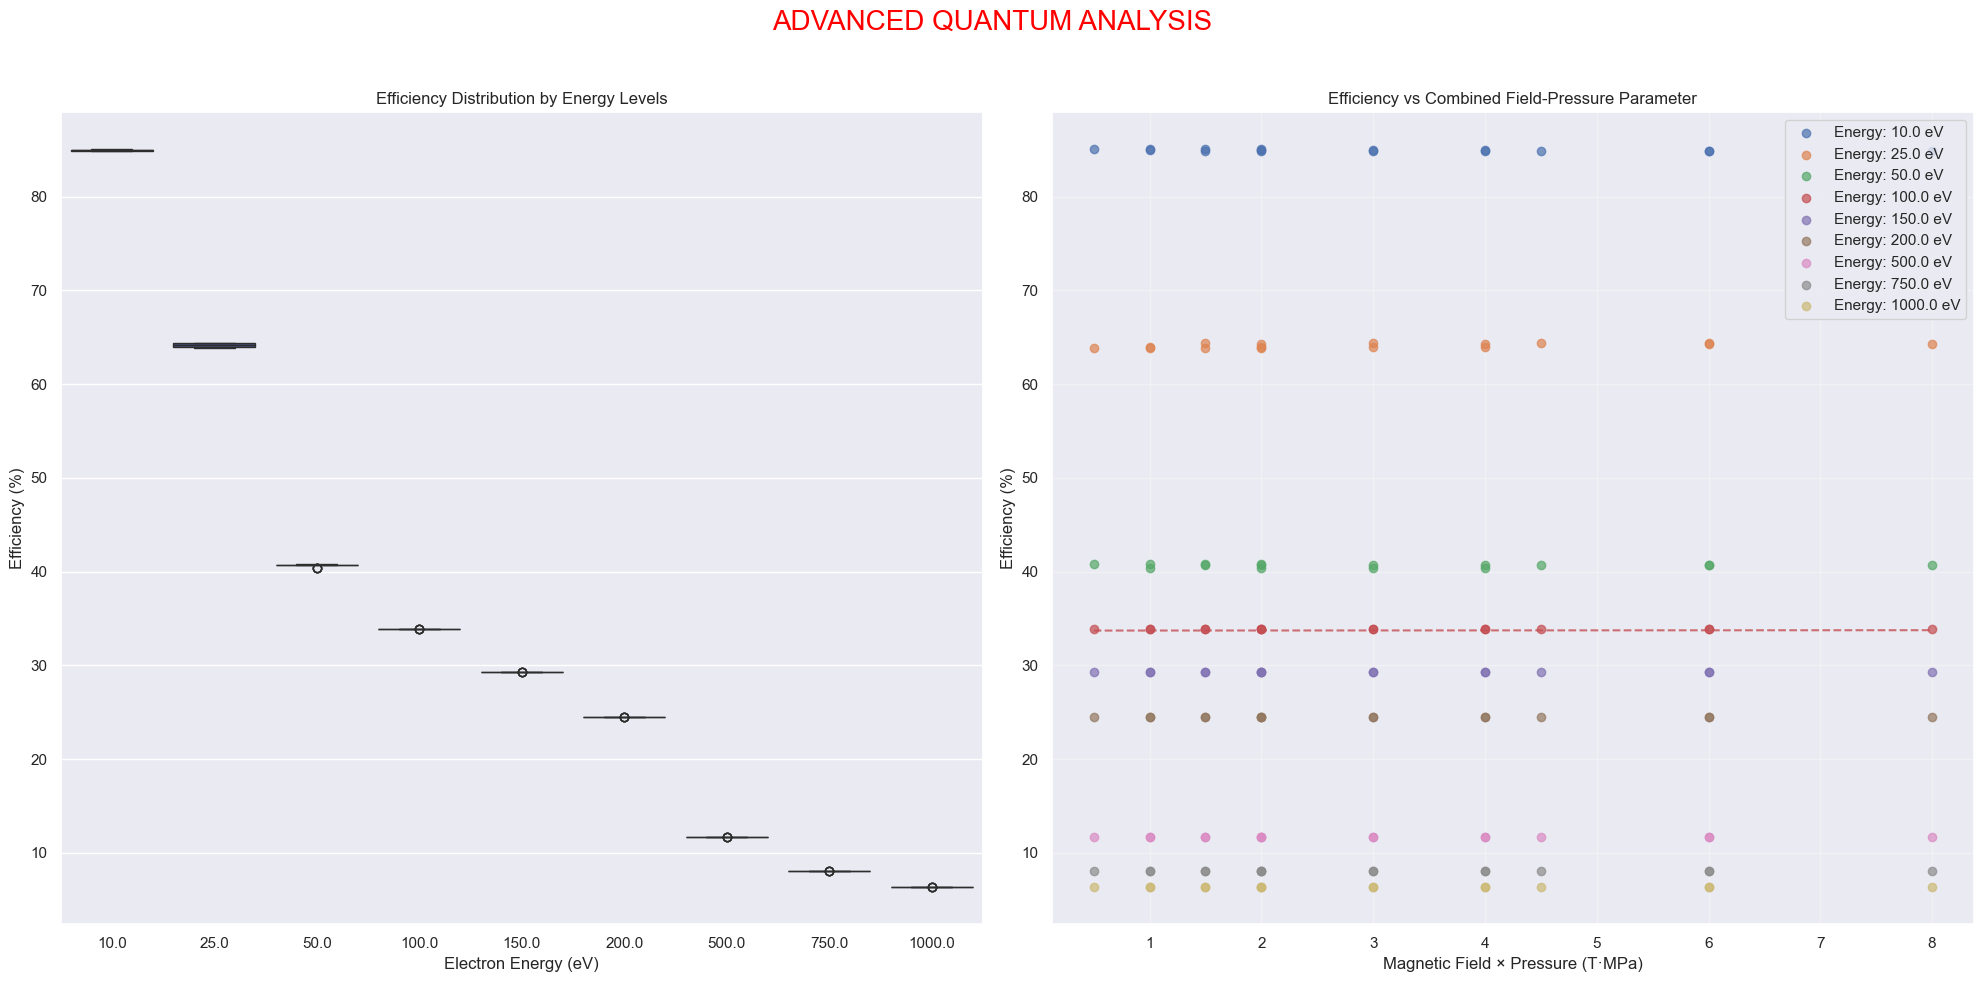

In [28]:
main()